# Exploratory Data Analysis
----



### Lighthouse Labs, Midterm Project Project - Predicting Flight Delays.

##### January 13, 2023. Terre Leung, Tetiana Fesenko, and Jamie Dormaar

---

_Use this notebook to get familiar with the datasets we have. There is 10 questions we need to answer during the EDA._


_We shouldn't limit our EDA to these 10 questions. Let's be creative :)._

In [121]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme()

from scipy import stats

import warnings
warnings.filterwarnings('ignore')



In [2]:
# Load data tables:
flights = pd.read_csv('../data/flights.csv', delimiter= ',')
flights_test = pd.read_csv('../data/flights_test.csv', delimiter= ',')
fuel_consumption = pd.read_csv('../data/fuel_consumption.csv', delimiter= ',')
passengers = pd.read_csv('../data/passengers.csv', delimiter= ',')

In [8]:
# Save working copies of the data:
fl_df = flights.copy()
fl_test_df = flights_test.copy()
fc_df = fuel_consumption.copy()
pa_df = passengers.copy()

In [3]:
# First look at tables:
print(f'\nflights.shape: {flights.shape}')
display(flights.head())

print(f'\nflights_test.shape: {flights_test.shape}')
display(flights_test.head())

print(f'\nfuel_consumption.shape: {fuel_consumption.shape}')
display(fuel_consumption.head())

print(f'\npassengers.shape: {passengers.shape}')
display(passengers.head())



flights.shape: (500000, 41)


,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime
0,2018-04-08,AA,AA,AA,2729,AA,N952NN,2729,11057,CLT,...,1,930,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-04-08,AA,AA,AA,2730,AA,N908AA,2730,12889,LAS,...,1,236,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-04-08,AA,AA,AA,2731,AA,N900UW,2731,11292,DEN,...,1,641,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-04-08,AA,AA,AA,2733,AA,N992AU,2733,12953,LGA,...,1,1389,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-04-08,AA,AA,AA,2734,AA,N864NN,2734,11057,CLT,...,1,930,0.0,0.0,17.0,0.0,0.0,NaN,NaN,NaN



flights_test.shape: (660556, 20)


,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,crs_arr_time,dup,crs_elapsed_time,flights,distance
0,2020-01-01 00:00:00,WN,WN,WN,5888,WN,N951WN,5888,13891,ONT,"Ontario, CA",14771,SFO,"San Francisco, CA",1810,1945,N,95,1,363
1,2020-01-01 00:00:00,WN,WN,WN,6276,WN,N467WN,6276,13891,ONT,"Ontario, CA",14771,SFO,"San Francisco, CA",1150,1320,N,90,1,363
2,2020-01-01 00:00:00,WN,WN,WN,4598,WN,N7885A,4598,13891,ONT,"Ontario, CA",14831,SJC,"San Jose, CA",2020,2130,N,70,1,333
3,2020-01-01 00:00:00,WN,WN,WN,4761,WN,N551WN,4761,13891,ONT,"Ontario, CA",14831,SJC,"San Jose, CA",1340,1455,N,75,1,333
4,2020-01-01 00:00:00,WN,WN,WN,5162,WN,N968WN,5162,13891,ONT,"Ontario, CA",14831,SJC,"San Jose, CA",915,1035,N,80,1,333



fuel_consumption.shape: (3035, 25)


,month,airline_id,unique_carrier,carrier,carrier_name,carrier_group_new,sdomt_gallons,satl_gallons,spac_gallons,slat_gallons,...,sdomt_cost,satl_cost,spac_cost,slat_cost,sint_cost,ts_cost,tdomt_cost,tint_cost,total_cost,year
0,1,NaN,NaN,0JQ,NaN,1,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0,5100,0.0,5100,2016
1,1,21352.0,0WQ,0WQ,Avjet Corporation,1,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0,396216,140239.0,536455,2016
2,1,21645.0,23Q,23Q,Songbird Airways Inc.,1,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0,0,0.0,0,2016
3,1,21652.0,27Q,27Q,"Jet Aviation Flight Services, Inc.",1,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0,0,0.0,0,2016
4,1,20408.0,5V,5V,Tatonduk Outfitters Limited d/b/a Everts Air A...,1,260848.0,0.0,0.0,0.0,...,522405,0.0,0.0,0.0,0.0,522405,569497,0.0,569497,2016



passengers.shape: (300000, 37)


,departures_scheduled,departures_performed,payload,seats,passengers,freight,mail,distance,ramp_to_ramp,air_time,...,dest_city_name,dest_country,dest_country_name,aircraft_group,aircraft_type,aircraft_config,month,year,distance_group,class
0,3,3,3600,18,0,210,41,81,166,160,...,"Olga Bay, AK",US,United States,0,40,4,10,2019,1,F
1,3,3,3000,15,3,24,0,39,67,61,...,"Old Harbor, AK",US,United States,0,79,3,10,2019,1,F
2,3,3,3600,18,1,0,0,93,167,161,...,"Kodiak Island, AK",US,United States,0,40,4,10,2019,1,F
3,3,3,3600,18,4,175,86,14,38,32,...,"Seal Bay, AK",US,United States,0,40,4,10,2019,1,F
4,3,3,3600,18,0,209,41,10,32,26,...,"Lazy Bay, AK",US,United States,0,40,4,10,2019,1,F


In [10]:
# Check for nulls:
# flights Table percent Null content:
fl_df_nulls = fl_df.isnull().sum().sort_values(ascending= False)
percent = (fl_df.isnull().sum()/fl_df.isnull().count()).sort_values(ascending = False)
fl_df_missing_data = pd.concat(
    [fl_df_nulls, percent]
  , axis=1
  , keys=['Total', 'Percent']
  , verify_integrity= True
)
print(f'\nflights_missing_data.head(20)')
display(fl_df_missing_data.head(20))

# flights_test Table percent Null content:
fl_test_df_nulls = fl_test_df.isnull().sum().sort_values(ascending= False)
percent = (fl_test_df.isnull().sum()/fl_test_df.isnull().count()).sort_values(ascending = False)
fl_test_df_missing_data = pd.concat(
    [fl_test_df_nulls, percent]
  , axis=1
  , keys=['Total', 'Percent']
  , verify_integrity= True
)
print(f'\nflights_test_missing_data.head(20)')
display(fl_test_df_missing_data.head(20))

# fuel_consumption Table percent Null content:
fc_df_nulls = fc_df.isnull().sum().sort_values(ascending= False)
percent = (fc_df.isnull().sum()/fc_df.isnull().count()).sort_values(ascending = False)
fc_df_missing_data = pd.concat(
    [fc_df_nulls, percent]
  , axis=1
  , keys=['Total', 'Percent']
  , verify_integrity= True
)
print(f'\nfuel_consumption_missing_data.head(20)')
display(fc_df_missing_data.head(20))

# passengers Table percent Null content:
pa_df_nulls = pa_df.isnull().sum().sort_values(ascending= False)
percent = (pa_df.isnull().sum()/pa_df.isnull().count()).sort_values(ascending = False)
pa_df_missing_data = pd.concat(
    [pa_df_nulls, percent]
  , axis=1
  , keys=['Total', 'Percent']
  , verify_integrity= True
)
print(f'\npassengers_missing_data.head(20)')
display(pa_df_missing_data.head(20))



flights_missing_data.head(20)


,Total,Percent
longest_add_gtime,497206,0.994412
total_add_gtime,497206,0.994412
first_dep_time,497206,0.994412
cancellation_code,494796,0.989592
late_aircraft_delay,418264,0.836528
security_delay,418264,0.836528
nas_delay,418264,0.836528
weather_delay,418264,0.836528
carrier_delay,418264,0.836528
air_time,6683,0.013366



flights_test_missing_data.head(20)


,Total,Percent
tail_num,1499,0.002269
fl_date,0,0.000000
dest_airport_id,0,0.000000
flights,0,0.000000
crs_elapsed_time,0,0.000000
dup,0,0.000000
crs_arr_time,0,0.000000
crs_dep_time,0,0.000000
dest_city_name,0,0.000000
dest,0,0.000000



fuel_consumption_missing_data.head(20)


,Total,Percent
total_gallons,6,0.001977
tdomt_gallons,3,0.000988
slat_gallons,2,0.000659
slat_cost,1,0.000329
spac_cost,1,0.000329
satl_cost,1,0.000329
tint_gallons,1,0.000329
airline_id,1,0.000329
ts_gallons,1,0.000329
sint_gallons,1,0.000329



passengers_missing_data.head(20)


,Total,Percent
departures_scheduled,0,0.0
origin_city_market_id,0,0.0
origin_city_name,0,0.0
origin_country,0,0.0
origin_country_name,0,0.0
dest_airport_id,0,0.0
dest_city_market_id,0,0.0
dest,0,0.0
dest_city_name,0,0.0
dest_country,0,0.0


##### Taking a closer look a the delay details in the flights table:


In [11]:
fl_df.columns

Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time', 'dep_time',
       'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in',
       'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled',
       'cancellation_code', 'diverted', 'dup', 'crs_elapsed_time',
       'actual_elapsed_time', 'air_time', 'flights', 'distance',
       'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'late_aircraft_delay', 'first_dep_time', 'total_add_gtime',
       'longest_add_gtime'],
      dtype='object')

In [12]:
fl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 41 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   fl_date              500000 non-null  object 
 1   mkt_unique_carrier   500000 non-null  object 
 2   branded_code_share   500000 non-null  object 
 3   mkt_carrier          500000 non-null  object 
 4   mkt_carrier_fl_num   500000 non-null  int64  
 5   op_unique_carrier    500000 non-null  object 
 6   tail_num             499495 non-null  object 
 7   op_carrier_fl_num    500000 non-null  int64  
 8   origin_airport_id    500000 non-null  int64  
 9   origin               500000 non-null  object 
 10  origin_city_name     500000 non-null  object 
 11  dest_airport_id      500000 non-null  int64  
 12  dest                 500000 non-null  object 
 13  dest_city_name       500000 non-null  object 
 14  crs_dep_time         500000 non-null  int64  
 15  dep_time         

In [80]:
# fl_df[['arr_delay']].unique().count()
# fl_df[fl_df['arr_delay']]
fl_df[['arr_delay']].value_counts().sort_values(ascending=False).head(20)

arr_delay
-10.0        15493
-9.0         15347
-11.0        15288
-8.0         15192
-12.0        15104
-13.0        14783
-7.0         14669
-6.0         14491
-14.0        13868
-5.0         13631
-15.0        13439
-4.0         12762
-16.0        12496
-3.0         12024
-17.0        11595
-2.0         11377
-18.0        10783
-1.0         10736
 0.0          9848
-19.0         9819
dtype: int64

In [ ]:
fl_

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime
17085,2018-04-09 00:00:00,WN,WN,WN,1524,WN,N923WN,1524,10821,BWI,...,1,787,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
224490,2018-04-18 00:00:00,DL,DL,DL,112,DL,N819DX,112,12758,KOA,...,1,2688,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
294741,2018-04-22 00:00:00,UA,UA_CODESHARE,UA,5560,OO,N962SW,5560,11292,DEN,...,1,776,0.0,0.0,0.0,0.0,33.0,NaN,NaN,NaN
276568,2018-04-21 00:00:00,AS,AS_CODESHARE,AS,2482,QX,N433QX,2482,14747,SEA,...,1,93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
452494,2018-04-29 00:00:00,UA,UA_CODESHARE,UA,4244,EV,N11565,4244,11140,CRP,...,1,201,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


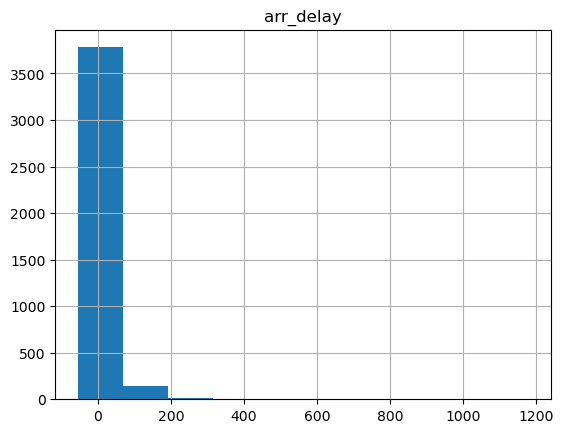

In [65]:
x.hist(column='arr_delay')
x.arr_delay.nunique()
x.head()

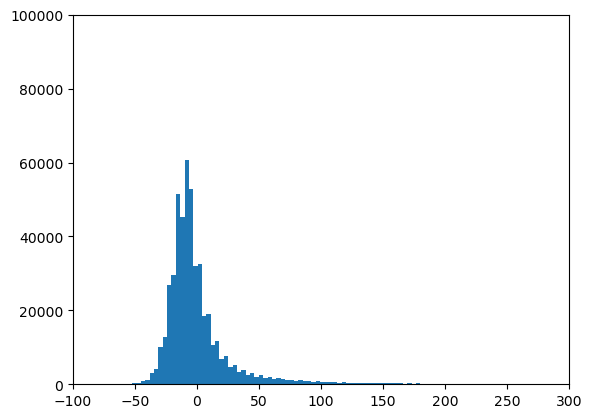

#### **Task 1**: Test the hypothesis that the delay is from Normal distribution. and that **mean** of the delay is 0. Be careful about the outliers.

In [89]:
fl_df['arr_delay'].describe()

count    493580.000000
mean          2.422061
std          41.391574
min         -77.000000
25%         -15.000000
50%          -6.000000
75%           5.000000
max        1685.000000
Name: arr_delay, dtype: float64

In [87]:
x = fl_df.sample(1000)
len(x)

1000

In [90]:
from scipy import stats

stat, p = stats.shapiro(x['arr_delay'])
print('%0.15f' % p, stat)

1.000000000000000 nan


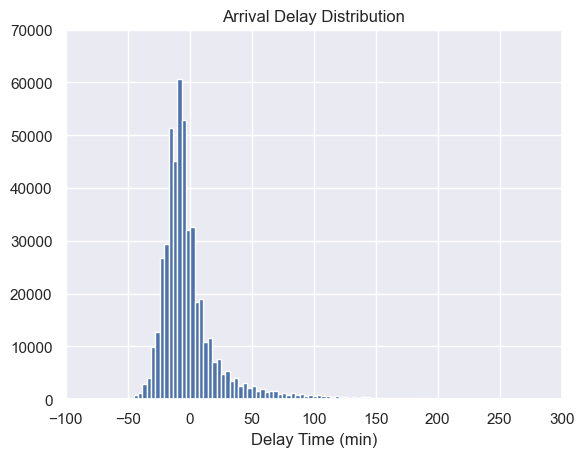

In [99]:
plt.hist(fl_df['arr_delay'], bins=500)


plt.xlabel('Delay Time (min)')
plt.title('Arrival Delay Distribution')
plt.xlim(-100, 300)
plt.ylim(0, 70000)
plt.show()

<AxesSubplot: xlabel='arr_delay'>

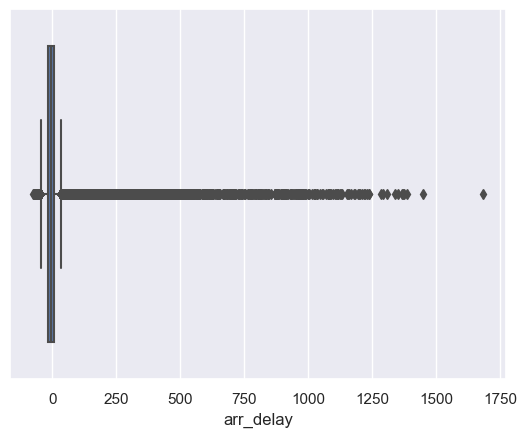

In [116]:
# Outlier detection:
sns.boxplot(x=fl_df['arr_delay'])


In [117]:
# outliers = fl_df[fl_df['arr_delay']>100]
# fl_df_clean = fl_df[fl_df['arr_delay']<100]

In [124]:
Q1 = fl_df.quantile(0.25)
Q3 = fl_df.quantile(0.75)
IQR = Q3 - Q1

In [125]:
fl_df_clean = fl_df[~((fl_df < (Q1 - 1.5 * IQR)) |(fl_df > (Q3 + 1.5 * IQR))).any(axis=1)]
fl_df_clean.shape

(359013, 41)

<AxesSubplot: xlabel='arr_delay'>

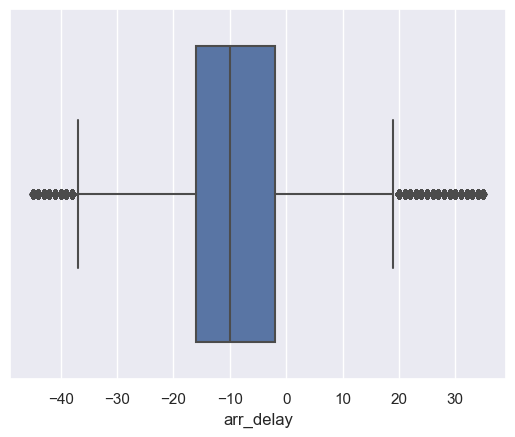

In [127]:
sns.boxplot(x=fl_df_clean['arr_delay'])

In [128]:
# fig, ax1 = plt.subplots()

# ax1 = fl_df_clean.plot()
# ax2 = fl_df.plot()

# ax1.hist([y1, y2])
# ax1.set_xlim(-10,10)
# fig, (ax1, ax2) = plt.subplots(1, 2)


#### **Task 2**: Is average/median monthly delay different during the year? If yes, which are months with the biggest delays and what could be the reason?

In [ ]:
# STEP 1 - convert date from strings to date time

In [ ]:
# STEP 2 - Create new columns for month, weekday,  year, and time of day

#### **Task 3**: Does the weather affect the delay? 
Use the API to pull the weather information for flights. There is no need to get weather for ALL flights. We can choose the right representative sample. Let's focus on four weather types:
- sunny
- cloudy
- rainy
- snow.
Test the hypothesis that these 4 delays are from the same distribution. If they are not, which ones are significantly different?

#### **Task 4**: How taxi times changing during the day? Does higher traffic lead to bigger taxi times?

#### **Task 5**: What is the average percentage of delays that is already created before departure? (aka are arrival delays caused by departure delays?) Are airlines able to lower the delay during the flights?

#### **Task 6**: How many states cover 50% of US air traffic? 

#### **Task 7**: Test the hypothesis whether planes fly faster when there is the departure delay? 

#### **Task 8**: When (which hour) do most 'LONG', 'SHORT', 'MEDIUM' haul flights take off?

#### **Task 9**: Find the top 10 the bussiest airports. Does the biggest number of flights mean that the biggest number of passengers went through the particular airport? How much traffic do these 10 airports cover?

#### **Task 10**: Do bigger delays lead to bigger fuel comsumption per passenger? 
We need to do four things to answer this as accurate as possible:
- Find out average monthly delay per air carrier (monthly delay is sum of all delays in 1 month)
- Find out distance covered monthly by different air carriers
- Find out number of passengers that were carried by different air carriers
- Find out total fuel comsumption per air carrier.

Use this information to get the average fuel comsumption per passenger per km. Is this higher for the airlines with bigger average delays?